# Phase2Pro - Iteration 5C

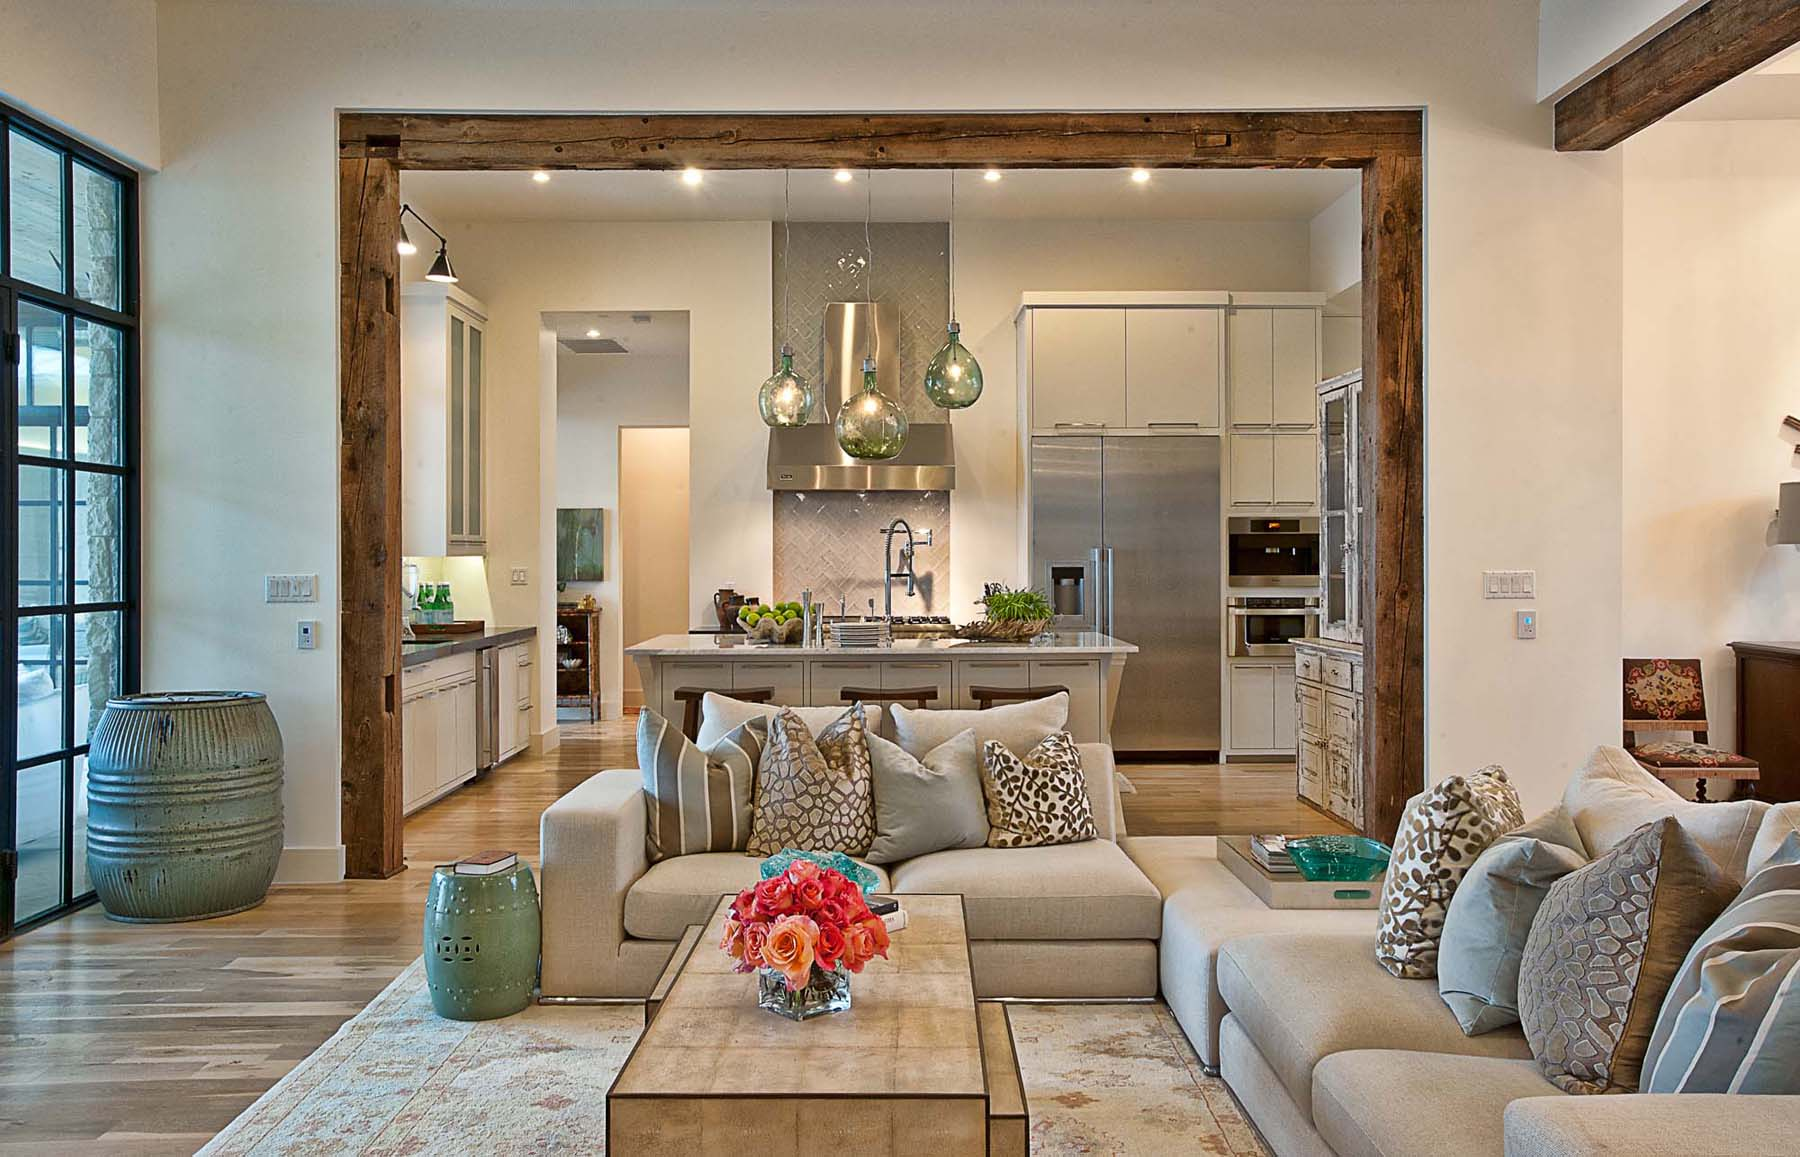

BUSINESS PROBLEM: 
King County Realty is a newly established local business in Northwestern America.
They are seeking some information regarding what attracts local buyers in this area to purchase new homes.
We will inspect the data set to determine what relationships and connections buyers have to purchasing a home and help King County Realty market their new business to suit.

What makes buyers in this area buy particular homes? 

A linear regression model will be used to understand the connections to the business problem usingthe OSMIN Model a our Data Science Process. 

In [1]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

**OBTAIN** - Data has been sourced from kc_house_data.csv.

In [2]:
#Import data set
data = pd.read_csv('data\\kc_house_data.csv')
data.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**SCRUB**: During this stage, we'll focus on cleaning the data. 

#Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration. This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded.

In [3]:
#refined dataset and drop unnecessary column data
data.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'waterfront', 'yr_renovated'], axis=1, inplace=True)

In [4]:
#Removed duplicates, show completed - Scrub
data.drop_duplicates(inplace=True)
#Show unique values for column data
data.nunique()

price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
condition         5
grade            11
yr_built        116
zipcode          70
dtype: int64

In [5]:
#See size of dataset - Scrub
data.shape

(21589, 10)

In [6]:
#Show current types - Scrub
print(data.dtypes)
data = data.astype("int64", errors='ignore')
data.info()

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
condition        int64
grade            int64
yr_built         int64
zipcode          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        21589 non-null  int64
 1   bedrooms     21589 non-null  int64
 2   bathrooms    21589 non-null  int64
 3   sqft_living  21589 non-null  int64
 4   sqft_lot     21589 non-null  int64
 5   floors       21589 non-null  int64
 6   condition    21589 non-null  int64
 7   grade        21589 non-null  int64
 8   yr_built     21589 non-null  int64
 9   zipcode      21589 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


In [7]:
population_mean = data.sqft_living.mean()
population_mean

2080.4155356894717

In [8]:
# Take a sample of 50 records
sample = data.sample(n=50, random_state=22)
# Calculate the sample mean
sample_mean = sample.sqft_living.mean()
sample_mean

2211.68

In [9]:
# Find the difference between the sample and population means
err = np.abs(sample_mean - population_mean)
# Divide by the population mean to find a percent error
per_err = err / population_mean
per_err

0.0630953105563239

In [10]:
five_sample_means = []
for i in range(5):
    sample = data.sample(n=50, random_state=i+100)
    five_sample_means.append(sample.sqft_living.mean())
    
five_sample_means

[2037.8, 1987.24, 1987.6, 2116.64, 2147.6]

In [11]:
five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in five_sample_means]
five_sample_errors

[0.020484146055633284,
 0.04478698322092288,
 0.04461394086768906,
 0.017412129302583318,
 0.032293771680695804]

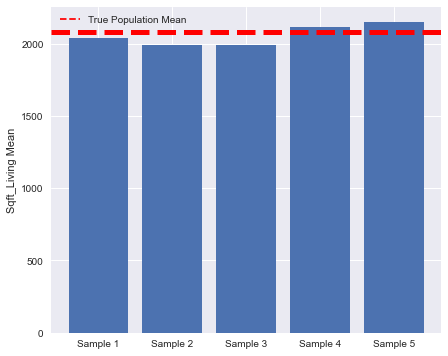

In [12]:
x_labels = [f"Sample {x}" for x in range(1, 6)]

fig, ax = plt.subplots(figsize=(7,6))

ax.bar(x_labels, five_sample_means)
ax.set_ylabel("Sqft_Living Mean")
ax.axhline(y=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D([0],[0], color="red", linestyle="--")],
    labels=["True Population Mean"],
    fontsize="medium"
);

In [13]:
#to view statistics - Scrub
#lamba function to remove exponential values - Scrub
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21589,21589,21589,21589,21589,21589,21589,21589,21589,21589
mean,"540,308.35",3.37,1.75,"2,080.42","15,103.90",1.45,3.41,7.66,"1,970.99","98,077.95"
std,"367,428.32",0.93,0.73,918.23,"41,419.63",0.55,0.65,1.17,29.37,53.52
min,78000,1,0,370,520,1,1,3,1900,98001
25%,322000,3,1,1430,5042,1,3,7,1951,98033
50%,450000,3,2,1910,7620,1,3,7,1975,98065
75%,645000,4,2,2550,10688,2,4,8,1997,98118
max,7700000,33,8,13540,1651359,3,5,13,2015,98199


Below we set to explore the data set by deriving statistics and creating visualisation with dummy test data.

Null hypothesis:
There is no difference between experimental and control group - the sqft_living space does NOT affect a buyers decision to purchase a home. 
𝜇1=𝜇2μ1=μ2

Alternative Hypothesis:
There is a difference between experimental and control group - the sqft_living space does affect a buyers decision when purchasing a home. 
𝜇1≠𝜇2μ1≠μ2
#alpha value is 0.05

y – Dependent Variable: 'price'
X – Independent variables: 'sqft_living', sqft_lot', 'bathrooms'
b – intercept: 
a – Slope: 

import scipy.stats as stats
x_bar = 20 # sample mean 
n = 218 # number of houses
sigma = 91 # sd of population
mu =  # Population mean 
z = (x_bar - mu)/(sigma/sqrt(n))
z


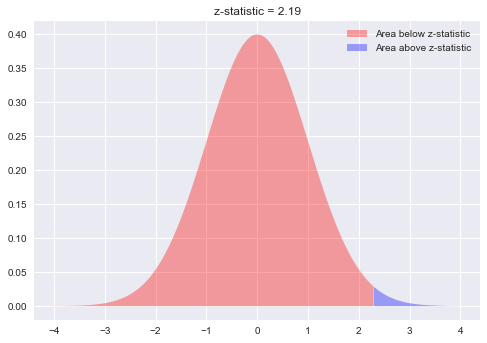

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,2.29,0.01),
                 y1= stats.norm.pdf(np.arange(-4,2.29,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(2.29,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2.29,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 2.19');


mu = 60
sigma = 30
n=36
x_bar = 75
z = (x_bar - mu)/(sigma/math.sqrt(n))
p = 1 - stats.norm.cdf(z)

p,z

# (p = 0.0013498980316301035, z = 3.0)

In [15]:
#show norm with degree of freedom
stats.norm.cdf(z)

NameError: name 'z' is not defined

#Pvalue minus degree of freedom 
pval = 1 - stats.norm.cdf(z)
pval

In [ ]:
#Plotted KDE - Explore
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [ ]:
# import libraries for OLS - Obtain 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula - Explore 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
#Display OLS Summary - Explore 
model.summary()

Note that the R squared value is between 0  and 1 with a value of 0.493. This is a great sign that the "sqft_living" coefficient has a strong relationship to sale price. This info will add value to further research regarding understanding the relationships connecting Kings County homebuyers' requirements of buying a property. 

In [ ]:
#create the column data
continuous = ['price', 'bedrooms', 'bathrooms', 'grade']
categoricals = ['sqft_living', 'sqft_lot', 'yr_built', 'zipcode', 'floors', 'condition']
data_cont = data[continuous]

In [ ]:
# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names

In [ ]:
#Created a scatter plot for linearity - Explore 
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'yr_built', 'sqft_lot']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

As we can see, compared amongst the three continuous variables that the sqft_living relationship is linear. There are some outliers here, however if outliers are removed, you can discren that the size of sqft_living area does have a relationship with price, whereas yr_built and sqft_lot are not linear at all and show no correlation with price. . 

In [ ]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~sqft_lot'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
model.summary()

In [ ]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'sqft_lot': [data.sqft_lot.min(), data.sqft_lot.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line
data.plot(kind='scatter', x='sqft_lot', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()
 

In [ ]:
# normalize 
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
data_log_norm = data_log.apply(normalize)

In [ ]:
# one hot encode categoricals 
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
X = preprocessed.drop('sqft_living', axis=1)
y = preprocessed['sqft_living']

In [ ]:
# Split the data into training and test sets (assign 20% to test set)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# A brief preview of train-test split to create test training data and dummy data set - Explore to Model 
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
# Force data as pandas DataFrame - Model 
def kfolds(data, k):
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size          
    return folds 

In [ ]:
#Setting axis 
data_data = pd.concat([X.reset_index(drop=True), y], axis=1)
data_folds = kfolds(data_data, 5)

In [ ]:
#import mse packages and declare variable names
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [ ]:
#result of the mean
#cv_5_results.mean()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
sqft_living = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('sqft_lot vs. sqft_living', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/810 c='black')
plt.xlabel('sqft_living', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

In [ ]:
#building the comparison data in a scatter plot 
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Housing Training Error')
plt.scatter(t_sizes, test_err, label='Housing Testing Error')
plt.legend()

In [ ]:
#Paired sample t-test (although data set is over 30)- exploration

data = pd.read_csv('data\\kc_house_data.csv')
data[['price','sqft_living']].describe()
ttest,pval = stats.ttest_rel(data['price'], data['sqft_living'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

In [ ]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
data_log_norm = data_log.apply(normalize)

In [ ]:
# one hot encode categoricals with dummy categoricals
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
X = preprocessed.drop('sqft_living', axis=1)
y = preprocessed['sqft_living']

In [ ]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# A brief preview of train-test split samples
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

In [ ]:
#import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
#creating the variable called model ; to create the best line of fit - we are passing the regression 
#Y is our dependant variable #X is independent variable 
f = 'price~sqft_living'
model = ols(formula=f, data=df).fit()
#prompt for mod summary
model.summary()

In [ ]:
#visualisation used to model and interpret the data 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [ ]:
#import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
#Visualize price of houses in relation to sqft_living
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Price in relation to sqft_living', fontsize=12)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c='black')
plt.xlabel('yr_built', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [ ]:
#setting predictors location  
data_pred = data.iloc[:,0:12]
data_pred.head()

In [ ]:
#visualse 
data_pred.corr()

In [ ]:
#check for connections 
abs(data_pred.corr()) > 0.75

In [ ]:
#Cleaning data 
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column to cc 
df.columns = ['cc']

# drop duplicates. 
df.drop_duplicates(inplace=True)

In [ ]:
#quick preview
df[(df.cc>.75) & (df.cc <1)]

In [ ]:
#creatinga heatmap to learn even more 
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

Each square shows the correlation between the variables on each axis. Correlation ranges from -2 to +1. Data closer to zero means there is no linear relationship between the two variables.
We add further complexity when connecti. 

In [ ]:
#3 important parameter estimates or statistics.

In [ ]:
#after you finish refining your models, you should provide 1-3 paragraphs discussing your final model

In [ ]:
 #your notebook and presentation should discuss at least two features that have strong relationships with housing prices.